# 02. Neural Network classification with PyTorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as options)

## 1. Make classification data and get it ready

In [83]:
import sklearn

In [84]:
from sklearn.datasets import make_circles

# Make a 1000 samples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,  # numpy arrays
                   noise=0.03,
                   random_state=42)



In [85]:
len(X),len(y)

(1000, 1000)

In [86]:
print(f"First 5 samples of x: \n {X[:5]}")
print(f"First 5 samples of y: \n {y[:5]}")

First 5 samples of x: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: 
 [1 1 1 1 0]


In [87]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "label":y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


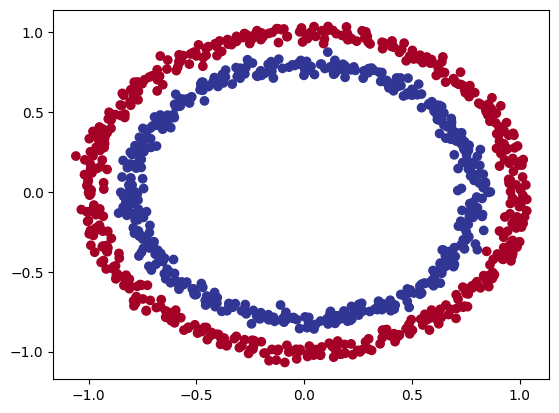

In [88]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)


Note : the data we are often we are working with is often reffered to as toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals

Practice more on toy data sets (can be found online)

# 1.1 Check input and output shapes

In [89]:
X.shape,y.shape

((1000, 2), (1000,))

In [90]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [91]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y : {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and same for y : {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y : 1
Shapes for one sample of X: (2,) and same for y : ()


### 1.2 Turn data into tensors and create train and test splits


In [92]:
import torch
torch.__version__


'2.1.0+cu121'

In [93]:
# Turn data into tensors
X= torch.from_numpy(X).type(torch.float) # torch's default type float32
y= torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

# probably througing error as data is already in tensor

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [94]:
type(X),X.dtype,y.dtype # altready tensor

(torch.Tensor, torch.float32, torch.float32)

In [95]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split  # splits array into random train and test subset

X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2, # 20% of data will be tested and 80% will be trained
                                                 random_state=42) # random seed of sklearn


In [96]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

# 2. Building a model

let's build a model to classify our blue and red dots

To do so , we want to:
1. set up device agnostic code, so our code will run on GPU if there is one
2.  construct a model (by subclassing `nn.Module`)
3. Define loss function and optimizer
4. Create a training and test loop

In [97]:
# Import torch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [98]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code, let's create a model that :

1. Subclasses `nn.Module`
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass / computation
4. Instaintiate an instance of our model class and send it to target device

In [99]:
#1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create two nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2,   # takes 2 features and upscales to 5 features
                             out_features=5)  # hidden feature
    # infeature of layer_2 == out_feature of layer 1 (or shape mismatch error)
    self.layer_2 = nn.Linear(in_features=5,out_features=1)  # takes in 5 features from previous layer and outputs a single layer (same as y)

    # creating model using nn.Sequential

    # self.two_linear_layers = nn.Sequential(
    #     nn.Linear(in_features=2,out_features=5),
    #     nn.Linear(in_features=5,out_features=1)
    # )

  # Define a forward() method that outlines the forward pass
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) # x->layer_1 -> layer_2 -> output
    # return two_linear_layers


# 4. instantiate an instance of our model class and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

mentioned below if our current model with 2 input feature and 5 features at hidden layer, and then all 5 feature ouputs 1 ouput feature

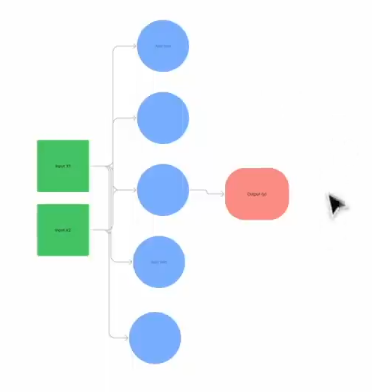

In [100]:
next(model_0.parameters()).device # model parameters are on device

device(type='cpu')

In [101]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5), # layer1
    nn.Linear(in_features=5,out_features=1)).to(device) # layer 2

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [102]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [103]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions : {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"Length of test samples : {len(X_test)} and shape : {X_test.shape}")
print(f"First 10 predictions : \n {untrained_preds[:10]}")
print(f"First 10 labels : \n {y_test[:10]}")

Length of predictions : 200, shape: torch.Size([200, 1])
Length of test samples : 200 and shape : torch.Size([200, 2])
First 10 predictions : 
 tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]])
First 10 labels : 
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [104]:
X_test[:10],y_test[:10]  # actual data

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Set up loss function and optimizer

which loss function and optimizer should we use ?

again..this is problem specific:


For ex: for regression we can use MAE or MSE (mean absolute error or mean squared error)

For classification : we can use binary cross entropy or categorical cross entropy (cross entropy)

and for optimizers, two of the most common and useful are SGD and Adam,however pyTorch has many built in options

* For loss function we are going to use `torch.nn.BECWithLogitsLoss()`

* For differnt optimizers see `torch.optim`

In [105]:
# setup the loss function
# loss_fn = nn.BCELoss() # BCELoss => requires input to have gone through the sigmoid activation function priror to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() #BCEWithLogitsLoss = sigmoid activation fuction built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1 )

In [106]:
# Calculate accuracy - out of 100 examples, what percentage dos our model get right?
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## 3. Train Model

To train our mode, we are going to build a training loop
1. Forward pass
2. calculate the loss
3. Optimizer zero_grad
4. Backpropagtion
5. Optimizer step (gradient descent)


### 3.1 Going  from raw logits -> prediction probabilities -> prediction labels

our model ouptuts are going to be raw **logits**

we can convert this **logits** into prediction probabilities by passing them to some kind of acitivation function eg. sigmoid for binary classifiction and softmax for multi-class classification

Then we can convert our model's prediction probabilites to **prediction labels** by either rounding them or takin `argmax()`.

In [107]:
# View the first 5 ouputs of the forward pass on the test data
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]])

In [108]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [109]:
# Use sigmoid activation function on our model logits to trun them into prediction probabilites
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs


tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]])

For our prediction probability values , we need to perform a range-style rounding on them:
*`y_pred_probs` >= 0.5 , `y=1` (class 1)
* y_pred_probs` < 0.5, y=0` (class 0)

In [110]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(f"{torch.eq(y_preds.squeeze(),y_pred_labels.squeeze())}")

# get rid of extra dimension
y_preds.squeeze()


tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 1.])

In [111]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

# Building a trainng and testing loop

In [112]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train)
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69796, Accuracy: 51.88% | Test loss: 0.69440, Test acc: 58.00%
Epoch: 10 | Loss: 0.69590, Accuracy: 51.25% | Test loss: 0.69305, Test acc: 53.00%
Epoch: 20 | Loss: 0.69490, Accuracy: 51.62% | Test loss: 0.69254, Test acc: 49.50%
Epoch: 30 | Loss: 0.69435, Accuracy: 51.12% | Test loss: 0.69236, Test acc: 49.50%
Epoch: 40 | Loss: 0.69401, Accuracy: 50.88% | Test loss: 0.69232, Test acc: 51.00%
Epoch: 50 | Loss: 0.69378, Accuracy: 50.25% | Test loss: 0.69234, Test acc: 50.00%
Epoch: 60 | Loss: 0.69362, Accuracy: 50.00% | Test loss: 0.69239, Test acc: 51.50%
Epoch: 70 | Loss: 0.69351, Accuracy: 50.25% | Test loss: 0.69246, Test acc: 51.00%
Epoch: 80 | Loss: 0.69342, Accuracy: 49.88% | Test loss: 0.69254, Test acc: 50.00%
Epoch: 90 | Loss: 0.69336, Accuracy: 49.88% | Test loss: 0.69262, Test acc: 53.00%


## 4. Make predictions and evaluate model

From metrics it looks like our model is'nt  learning anythin ...
so to inspect it let's make some predictions and make them visual

To do so, wer are going to import a function called `plot_descion_boundary()`

In [113]:
import requests
from pathlib import Path

# Download helper functions from Learn Ptorch repo (if its not downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists , skip dwonload")
else:
  print("Download helper_function.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exists , skip dwonload


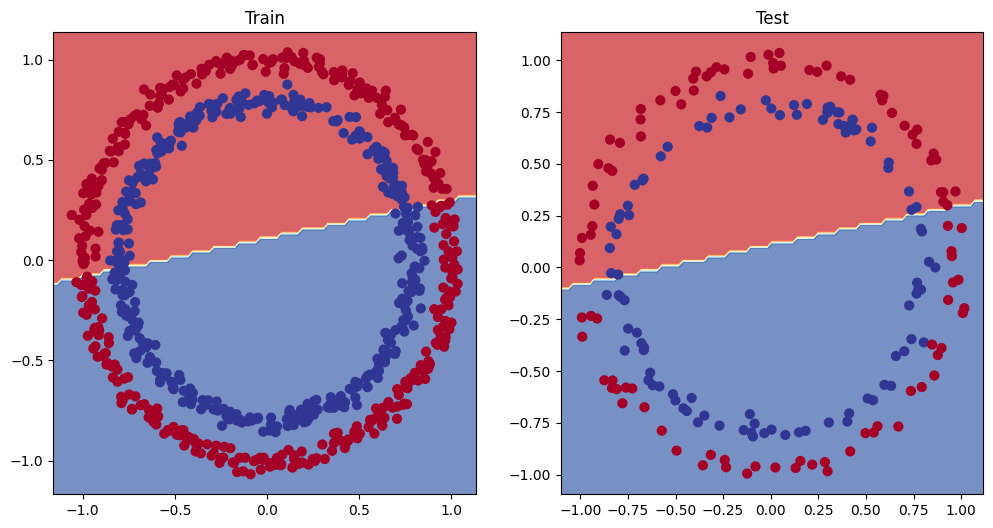

In [114]:
# Plot decision bounday of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns
* add more hidden units - go from 5 hidden units to 10 hidden units (out_features/in_features)
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss functions

These options are all from model's perspective , and not from data perspective
All these options can be provided as **hyperparameters**


Let's try and improve our model by:
* adding more hidden unit: 5-> 10
* Increase the number of layers : 2->3
* Increase the number of epochs : 100->1000

In [115]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    # z = self.layer_1(x) # passing data through our layers
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverages speed ups where possible behind the scenes

model_1 = CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [116]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [117]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.1)

In [118]:
# Write training and evaluation loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 10000

# Put data on the target device
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  ## Training
  model_1.train()
  ## 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilites -> prediction labels

  # 2. Calculate loss / acc
  loss =loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backwards
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()


  ## Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. calculate loss/acc
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 1000 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 1100 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc:

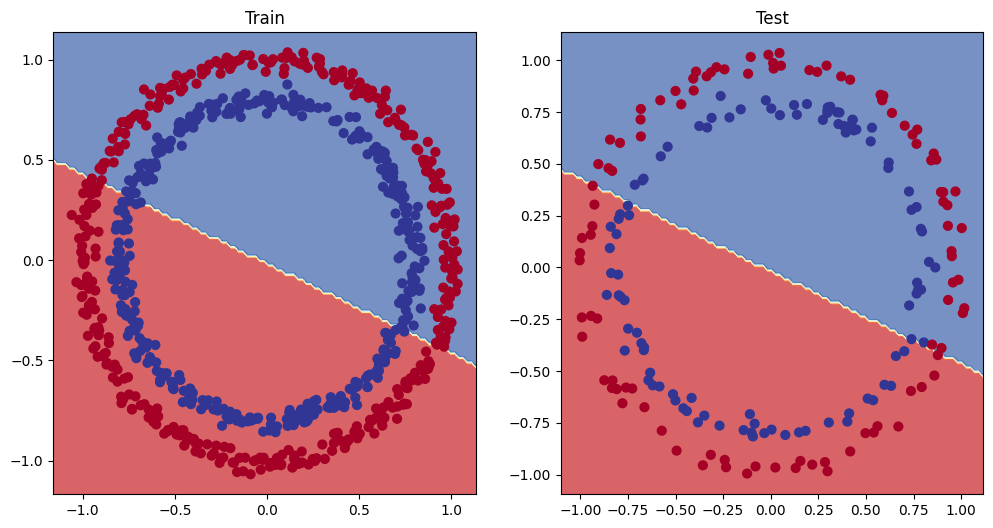

In [119]:
# Plot decision bounday of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

### 5.1 Preparing data to see if our model can fit a straight line

one way to troubleshoot  to a larger problem is to test out a smaller problem

In [120]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# Check the data
print(len(X_regression))
X_regression[:5],y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [121]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression,y_train_regression = X_regression[:train_split],y_regression[:train_split]
X_test_regression,y_test_regression = X_regression[train_split:],y_regression[train_split:]

len(X_train_regression),len(X_test_regression),len(y_train_regression),len(y_test_regression)

(80, 20, 80, 20)

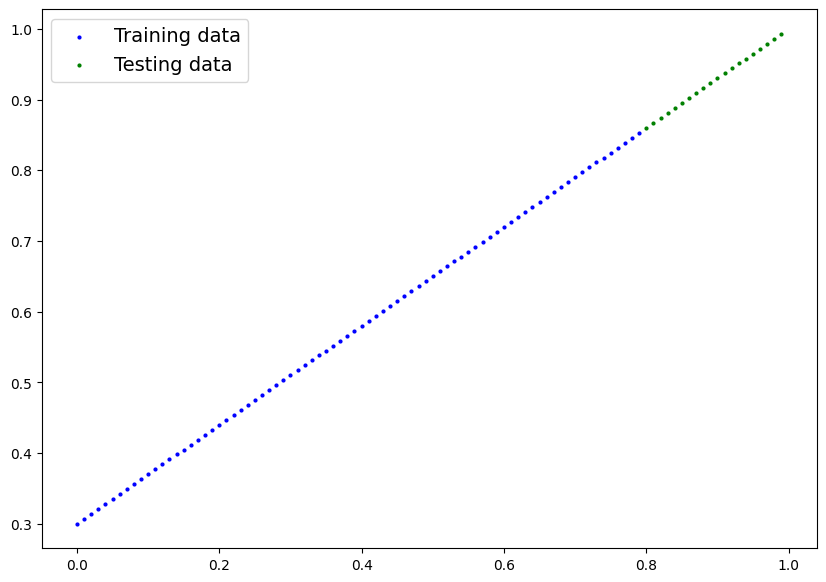

In [122]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)



### 5.2 Adjusting `model_1` to fit a straight line (in_features needs to be 1)

In [123]:
# Same architecture as model_1 but using nn.Sequential()

model_2 = nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [124]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer= torch.optim.SGD(params=model_2.parameters(),
                           lr=0.01)


In [125]:
# Training the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# put data in target device
X_train_regression,y_train_regression = X_train_regression.to(device),y_train_regression.to(device)
X_test_regression,y_test_regression = X_test_regression.to(device),y_test_regression.to(device)

## Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred,y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ## Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred,y_test_regression)

    if epoch % 100 == 0:
      print(f"epoch : {epoch} | loss: {loss:.5f} | test loss : {test_loss}")

epoch : 0 | loss: 0.75986 | test loss : 0.9110288619995117
epoch : 100 | loss: 0.02858 | test loss : 0.0008127152686938643
epoch : 200 | loss: 0.02533 | test loss : 0.002092066453769803
epoch : 300 | loss: 0.02137 | test loss : 0.0030509470961987972
epoch : 400 | loss: 0.01964 | test loss : 0.003407782409340143
epoch : 500 | loss: 0.01940 | test loss : 0.0038725673221051693
epoch : 600 | loss: 0.01903 | test loss : 0.003789058420807123
epoch : 700 | loss: 0.01878 | test loss : 0.003813347313553095
epoch : 800 | loss: 0.01840 | test loss : 0.0032872825395315886
epoch : 900 | loss: 0.01798 | test loss : 0.00360372057184577


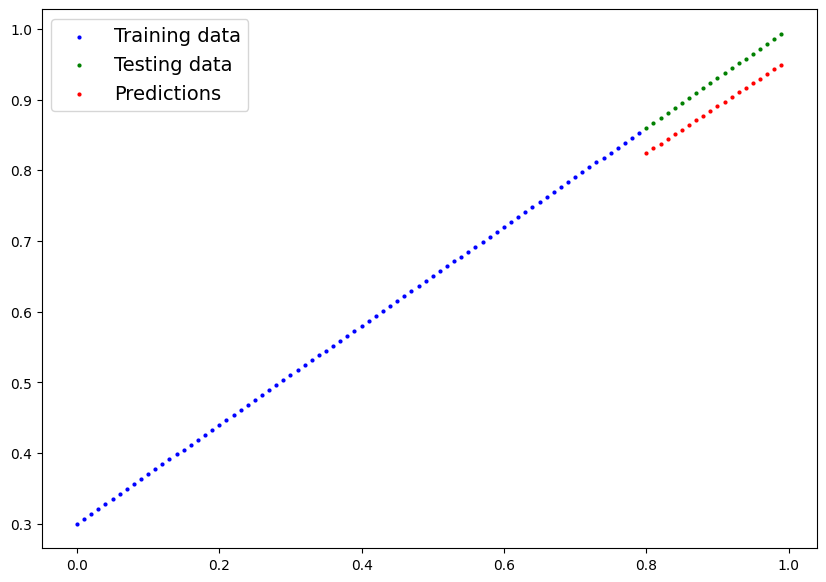

In [126]:
# Turn on evaluation mode
model_2.eval()

# make predictions
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# Plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

## 6. The missing piece : non-linearity

"What pattersn could you draw if you were given an infininte amount of straight and non-straight lines?"


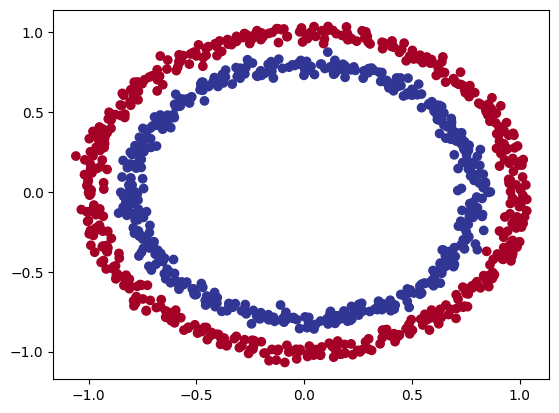

In [127]:
### 6.1 Recreating non-linear data (red and blue circles)
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [128]:
# Convert data to tensors and tehn to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# split into train and test sts
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=42)

X_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Bulding a model with non-linearity

* Linear - straight lines
* Non-straight Lines

Neural Networks are a large combination of linear and non-linear functions that are potentially able to find patterns in data

In [129]:
# Build a model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)
    self.relu = nn.ReLU() # non-linear activation function

  def forward(self,x):
    # Where should we put our non-linear activation function? (in-between our layers)
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2()
model_3 = model_3.to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [130]:
# Set up loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)


In [131]:
# Binary classification examples :
# spam or not spam
# credit cards = fraud or not fraud
# insurance claims = at fault or not at fault

# Training a model with non-linearity

In [132]:
# random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# put all the data on target device
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)


# loop through the data
epochs = 1000

for epoch in range(epochs):
  ### training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilites-> prediction labels

  # 2. calculate the loss/acc
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. backward loss
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  ## Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # print out what's happeing
    if epoch % 100 == 0:
      print(f"Epoch : {epoch} | loss : {loss:.4f} | Acc: {acc:.2f}% | test_loss : {test_loss:.4f} | test_acc : {test_acc:.2f}%")

Epoch : 0 | loss : 0.6929 | Acc: 50.00% | test_loss : 0.6932 | test_acc : 50.00%
Epoch : 100 | loss : 0.6912 | Acc: 52.88% | test_loss : 0.6910 | test_acc : 52.50%
Epoch : 200 | loss : 0.6898 | Acc: 53.37% | test_loss : 0.6894 | test_acc : 55.00%
Epoch : 300 | loss : 0.6879 | Acc: 53.00% | test_loss : 0.6872 | test_acc : 56.00%
Epoch : 400 | loss : 0.6852 | Acc: 52.75% | test_loss : 0.6841 | test_acc : 56.50%
Epoch : 500 | loss : 0.6810 | Acc: 52.75% | test_loss : 0.6794 | test_acc : 56.50%
Epoch : 600 | loss : 0.6751 | Acc: 54.50% | test_loss : 0.6729 | test_acc : 56.00%
Epoch : 700 | loss : 0.6666 | Acc: 58.38% | test_loss : 0.6632 | test_acc : 59.00%
Epoch : 800 | loss : 0.6516 | Acc: 64.00% | test_loss : 0.6476 | test_acc : 67.50%
Epoch : 900 | loss : 0.6236 | Acc: 74.00% | test_loss : 0.6215 | test_acc : 79.00%


### 6.4 Evaluating a model trained with non-linear activation functions


In [133]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

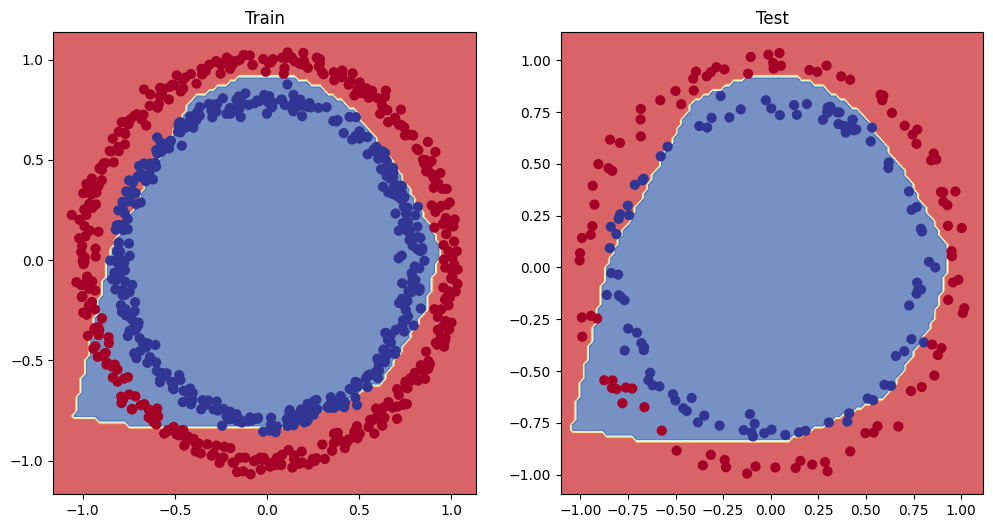

In [134]:
# Plot the decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test,y_test)

## 7. Replicating non-linear activation functions

 Neural networks, rather than us telling us the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own

 And these tools are linear and non-linear functions

In [135]:
# Create a tensor
A = torch.arange(-10,10,1,dtype=torch.float32)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

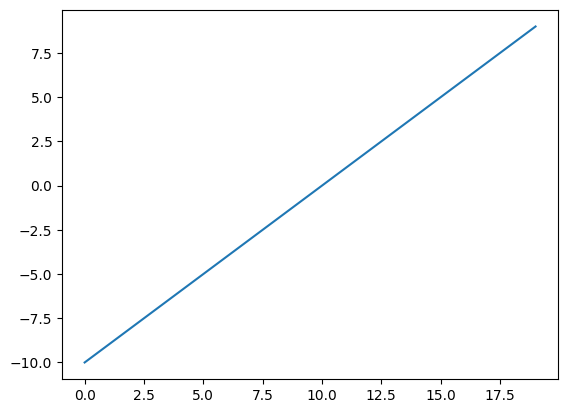

In [136]:
# Visualize this data
plt.plot(A)

In [137]:
## plt.plot(torch.relu(A))

In [138]:
## Our custom RelU activation function

def relu(x:torch.tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0),x) # inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

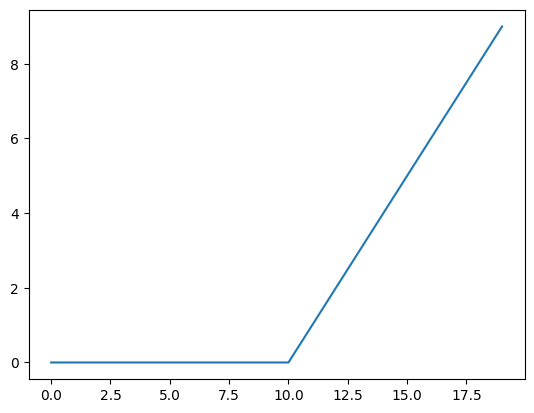

In [139]:
plt.plot(relu(A))

In [140]:
# Now let's create our own Sigmoid activation function
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

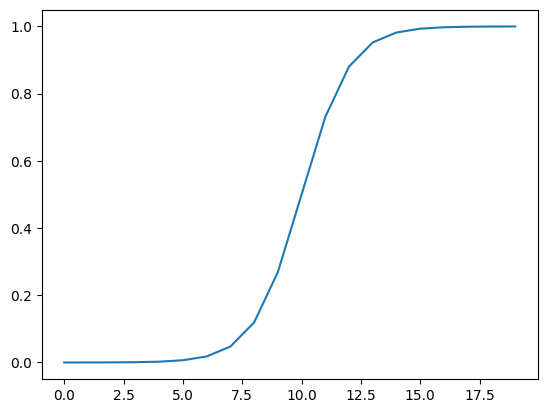

In [141]:
plt.plot(sigmoid(A))

# 8. Putting it all together with a multi-class classification problem

* Binary classification = one thing or another (ex: cats or dogs)
* multi-class classification = more than one thing or another (cat vs dog vs chicken and much more )

## 8.1 Creating a toy multi-class data-set


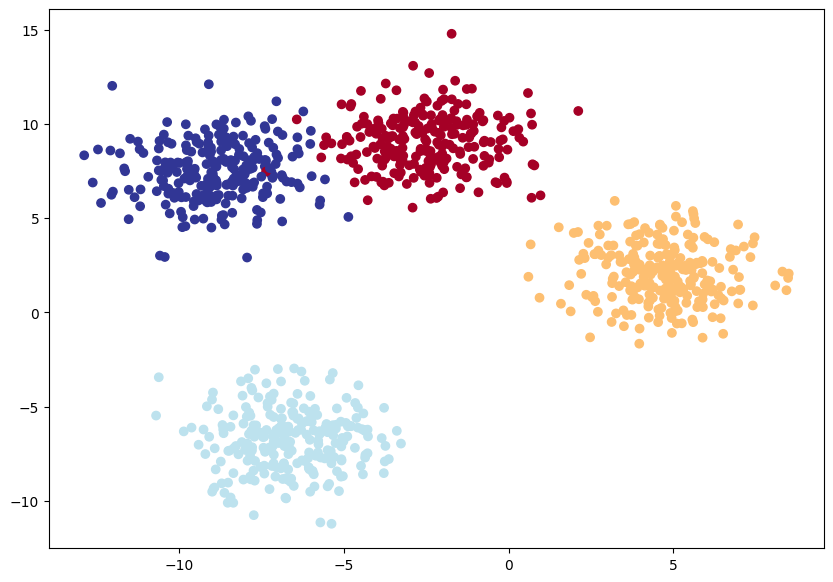

In [142]:
# Import dependencies
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set Hyper parameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42


# 1. Create multi-class data
X_blob,y_blob = make_blobs(n_samples=1000,
                          n_features=NUM_FEATURES,
                          centers=NUM_CLASSES,
                          cluster_std=1.5, # give the cluster a little shake up
                          random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train,X_blob_test,y_blob_train,y_blob_test = train_test_split(X_blob,
                                                                     y_blob,
                                                                     test_size=0.2,
                                                                     random_state=RANDOM_SEED)

# 4. Plot the data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)



### 8.2 Building a multi-class classification in pytorch

In [143]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [144]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    """ Intializes multi-class clasification model.
      Args :
      input_features (int): no. of input_features to the model
      output_features (int) : no. of ouput featuers (no. of output classes)
      hidden_units (int) : Number of hidden units between layers , default - 8
      """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)


# Create an instance of Blob model and send it to target device
model_4 = BlobModel(input_features=2,output_features=4,
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=8, bias=True)
    (5): ReLU()
    (6): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [145]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [146]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

[link text](https://)### 8.3 Create a loss function and an optimizer for multi-class classification model

* Cross Entropy loss
* SGD or Adam optimizer

In [147]:
# Create a loss function
loss_fn = nn.CrossEntropyLoss()

# create optimizer
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)


## 8.4 Getting prediction probabilities for a multi-class pyTorch model

In order to evaluate and train and test our model, we need to convert our model's ouput (logits) to prediction probabilites and then to prediction labels

Logits (raw output of the model) -> prediction probabilites (use `torch.softmax`) -> pred labels (take the arg max of the prediction probabilites)

In [148]:
# get some raw model ouputs (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits


tensor([[-0.3782, -0.0598,  0.2240,  0.1938],
        [-0.3166, -0.1224,  0.1877,  0.2034],
        [-0.3124, -0.2372,  0.2952,  0.2379],
        [-0.3386, -0.0803,  0.2329,  0.1795],
        [-0.3224, -0.0751,  0.2386,  0.1718],
        [-0.3203, -0.1184,  0.1726,  0.2133],
        [-0.3238, -0.2145,  0.2744,  0.2181],
        [-0.3122, -0.0881,  0.2237,  0.1789],
        [-0.3079, -0.2326,  0.2916,  0.2358],
        [-0.3106, -0.0812,  0.2342,  0.1718],
        [-0.3125, -0.0970,  0.2182,  0.1827],
        [-0.4040, -0.0480,  0.2121,  0.2069],
        [-0.3169, -0.0735,  0.2367,  0.1715],
        [-0.3138, -0.0751,  0.2224,  0.1796],
        [-0.3140, -0.0650,  0.2276,  0.1760],
        [-0.3151, -0.1183,  0.1964,  0.1975],
        [-0.3171, -0.1234,  0.1853,  0.2050],
        [-0.3002, -0.2252,  0.2878,  0.2322],
        [-0.3201, -0.1080,  0.1786,  0.2091],
        [-0.3158, -0.1291,  0.1884,  0.2030],
        [-0.3172, -0.1088,  0.1913,  0.2007],
        [-0.3096, -0.1037,  0.2285

In [149]:
y_blob_test[:5]

tensor([1, 3, 2, 1, 0])

In [150]:
# Convert our model's logits output to prediction probabilites
y_pred_probs = torch.softmax(y_logits,dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.3782, -0.0598,  0.2240,  0.1938],
        [-0.3166, -0.1224,  0.1877,  0.2034],
        [-0.3124, -0.2372,  0.2952,  0.2379],
        [-0.3386, -0.0803,  0.2329,  0.1795],
        [-0.3224, -0.0751,  0.2386,  0.1718]])
tensor([[0.1674, 0.2302, 0.3057, 0.2967],
        [0.1801, 0.2187, 0.2982, 0.3029],
        [0.1771, 0.1909, 0.3251, 0.3070],
        [0.1741, 0.2254, 0.3083, 0.2923],
        [0.1763, 0.2258, 0.3089, 0.2890]])


In [151]:
# Convert out model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2,
        2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2,
        2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3,
        3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3,
        2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
        2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
        2, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2,
        2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 3, 2, 2, 3, 2, 2, 2])

In [152]:
y_blob_test  # same format as y_preds

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Create a training and testing loop for a multi-class pyTorch Model


In [153]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

# Put data to the target device
X_blob_train,y_blob_train = X_blob_train.to(device),y_blob_train.to(device)
X_blob_test,y_blob_test = X_blob_test.to(device),y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
  ## Training
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits,y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  ## Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits,dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits,y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_pred)

    # print out metrics

    if epoch % 10 == 0:
      print(f"Epoch:{epoch} | loss : {loss:.4f} | acc: {acc:.2f}% | test_loss :{test_loss:.4f} | test_acc:{test_acc:.2f}%")




Epoch:0 | loss : 1.3828 | acc: 47.50% | test_loss :1.3525 | test_acc:55.00%
Epoch:10 | loss : 1.1864 | acc: 65.12% | test_loss :1.1432 | test_acc:69.50%
Epoch:20 | loss : 0.7616 | acc: 95.25% | test_loss :0.7508 | test_acc:97.00%
Epoch:30 | loss : 0.5203 | acc: 97.38% | test_loss :0.5378 | test_acc:98.50%
Epoch:40 | loss : 0.4827 | acc: 82.75% | test_loss :0.4679 | test_acc:88.50%
Epoch:50 | loss : 0.2696 | acc: 96.75% | test_loss :0.2750 | test_acc:98.50%
Epoch:60 | loss : 0.1936 | acc: 99.00% | test_loss :0.1908 | test_acc:99.50%
Epoch:70 | loss : 0.1568 | acc: 99.25% | test_loss :0.1525 | test_acc:99.50%
Epoch:80 | loss : 0.1317 | acc: 99.25% | test_loss :0.1268 | test_acc:99.50%
Epoch:90 | loss : 0.1127 | acc: 99.25% | test_loss :0.1072 | test_acc:99.50%


## 8.6 Making and evaluating predictions with a pytorch multi-class model


In [154]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# View first 10 predictions
y_logits[:10]

tensor([[ 3.5003,  8.8986, -6.6680, -5.5565],
        [ 1.0106, -5.9475, -1.2205,  5.5540],
        [-0.6912, -0.7529,  1.7784, -0.2333],
        [ 0.7451,  5.5361, -3.0197, -3.4770],
        [ 8.8403,  4.1950, -7.8879, -3.5528],
        [ 0.8887, -6.9541, -1.4604,  6.7444],
        [-0.7026, -0.7246,  1.7347, -0.2281],
        [ 6.7197,  0.3414, -5.4694, -0.7207],
        [-0.6952, -0.7625,  1.7816, -0.2253],
        [ 7.3765,  1.6149, -6.1591, -1.6940]])

In [155]:
# go from logits -> predictions probabilites
y_pred_probs = torch.softmax(y_logits,dim=1)
y_pred_probs[:10]

tensor([[4.5038e-03, 9.9550e-01, 1.7279e-07, 5.2510e-07],
        [1.0513e-02, 9.9977e-06, 1.1292e-03, 9.8835e-01],
        [6.5193e-02, 6.1294e-02, 7.7045e-01, 1.0306e-01],
        [8.2325e-03, 9.9146e-01, 1.9077e-04, 1.2076e-04],
        [9.9048e-01, 9.5152e-03, 5.3810e-08, 4.1075e-06],
        [2.8548e-03, 1.1206e-06, 2.7250e-04, 9.9687e-01],
        [6.6546e-02, 6.5100e-02, 7.6140e-01, 1.0696e-01],
        [9.9771e-01, 1.6941e-03, 5.0743e-06, 5.8572e-04],
        [6.4775e-02, 6.0560e-02, 7.7104e-01, 1.0363e-01],
        [9.9675e-01, 3.1358e-03, 1.3188e-06, 1.1464e-04]])

In [156]:
# go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

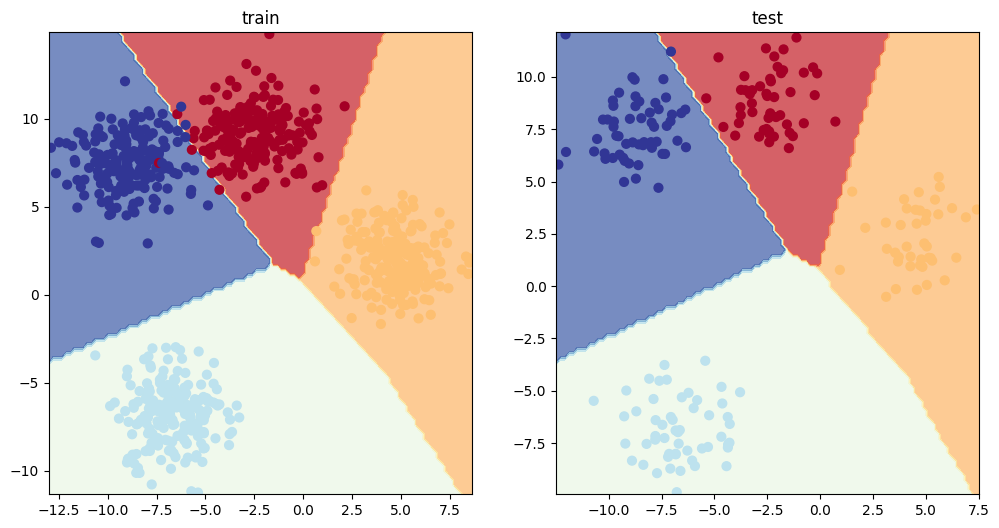

In [157]:
# visualize
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_4,X_blob_test,y_blob_test )

## 9. A few more classification metrics (to evaluate our classification model)

* Accuracy - out of 100 samples, how many our model get's right
* Percision
* Recall
* F1-score
* confusion matrix
* Classification report
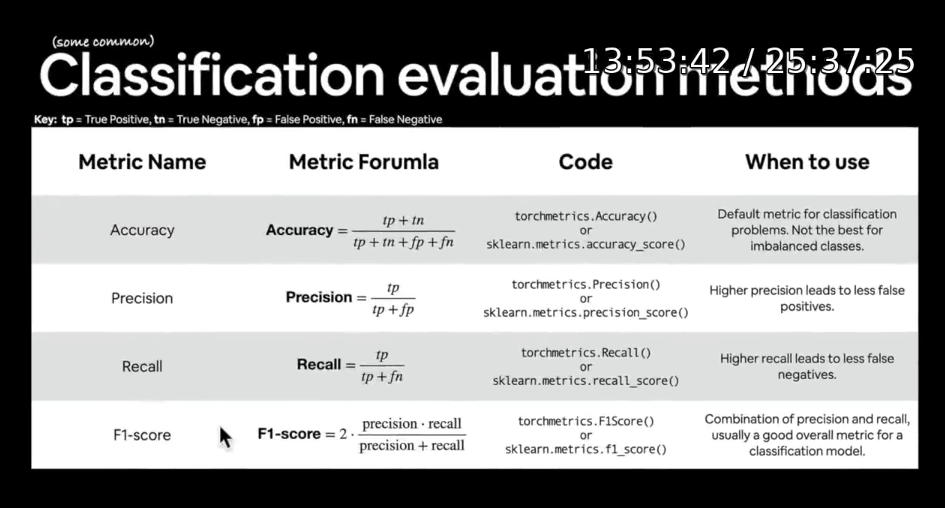

If we want to acess a lot of PyTorch metrics, install torchMetrics

In [158]:
pip install torchmetrics

In [159]:
from torchmetrics import Accuracy

# set_up metric
torchmetric_accuracy = Accuracy(task="MULTICLASS").to(device)

# calculate accuracy
torchmetric_accuracy(y_preds,y_blob_test)

ValueError: Optional arg `num_classes` must be type `int` when task is multiclass. Got <class 'NoneType'>

In [160]:
from torchmetrics import Accuracy

# set_up metric
torchmetric_accuracy = Accuracy(task="MULTICLASS", num_classes=10).to(device)

# calculate accuracy
torchmetric_accuracy(y_preds,y_blob_test)

tensor(0.9950)